In [20]:
# file name with directory
import os
import glob
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib widget

files = list(glob.glob(os.path.join("data/LowRes_Pathlines/PATHLINES_DoubleGyre2D.bin")))
files.sort(key=os.path.getctime) 
files

['data/LowRes_Pathlines/PATHLINES_DoubleGyre2D.bin']

In [21]:
file_list = files 

# UPDATE PATHLINE ID
pathline_render_freq_K = 20;

In [22]:
# Function to load a flow map from a file
def load_flow_map(filename):
    #pathlineDataType = np.dtype([('x', np.float32), ('y', np.float32), ('timestep', np.int32)])
    
    with open(filename, 'rb') as file:
        # Read the width, height, depth, and time (each as 4-byte integers)
        width = np.fromfile(file, dtype=np.int32, count=1)[0]
        height = np.fromfile(file, dtype=np.int32, count=1)[0]
        numberOfTimeSteps = np.fromfile(file, dtype=np.int32, count=1)[0]
        
        minTime = np.fromfile(file, dtype=np.float32, count=1)[0]
        maxTime = np.fromfile(file, dtype=np.float32, count=1)[0]
        dt = np.fromfile(file, dtype=np.float32, count=1)[0]
    
        #print(f"Width: {width}, Height: {height}, NumOfTimeSteps: {numberOfTimeSteps}, MinTime: {minTime}, MaxTime: {maxTime}, dt: {dt}")
        #file.read(8)
        data = np.fromfile(file, dtype=np.float32)

        #print("Values:")
        #print(data)
        
    steps_per_pathline = numberOfTimeSteps
    num_pathlines = width * height
    values_per_step = 3
    pathlinesData = data.reshape(num_pathlines, steps_per_pathline, values_per_step)

    #print("Values:")
    #print(pathlinesData[2])
    return pathlinesData


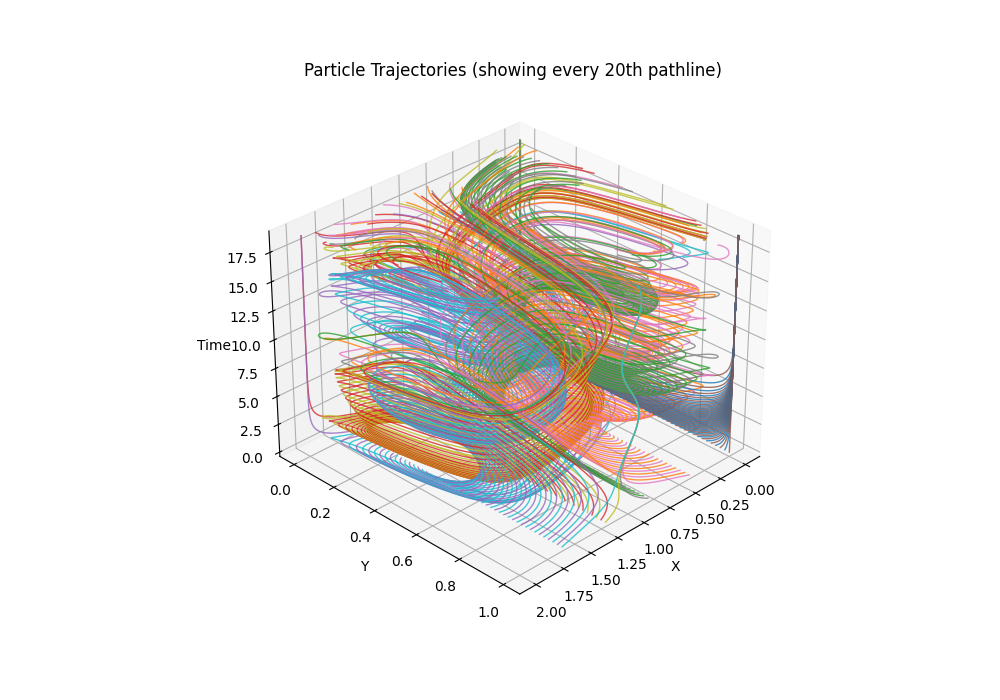

In [23]:




# Create a colormap
cmap = plt.cm.viridis  # You can try other colormaps like 'plasma', 'magma', etc.

pathlinesData = load_flow_map(file_list[0])

# Plot the trajectory in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

num_total_pathlines = len(pathlinesData)

# Plot every Kth pathline
for pathlineID in range(0, num_total_pathlines, pathline_render_freq_K):
    trajectory = pathlinesData[pathlineID]
 
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 
            lw=1, alpha=0.8)  # Reduced line width and added transparency
    
    #create segment to creat color coding of time-> too slow and now way to accelerate
    # Normalize time values to [0,1] for coloring
    # times = trajectory[:, 2]
    # points = np.array([trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]]).T
    # # Create line segments
    # points_pairs = np.array([points[:-1], points[1:]]).transpose(1,0,2)
    # # Create a LineCollection with varying colors
    # for i in range(len(points) - 1):
    #     segment = points_pairs[i]
    #     time = times[i]
    #     ax.plot(segment[:, 0], segment[:, 1], segment[:, 2],
    #             color=cmap(time/times.max()), 
    #             lw=1, alpha=0.5)

# Add a colorbar
# norm = plt.Normalize(times.min(), times.max())
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# plt.colorbar(sm, ax=ax, label='Time')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')

# Set plot title
ax.set_title(f'Particle Trajectories (showing every {pathline_render_freq_K}th pathline)')

# Rotate the plot to a better initial view
ax.view_init(elev=30, azim=45)  # Adjust elevation and azimuthal angle

# Show the plot
plt.show()